Labels

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pixel = pd.read_csv("fashion-mnist_train.csv")
pixel.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
label = pixel.pop("label")

In [4]:
label.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [5]:
pixel.loc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

In [6]:
label.loc[0]

2

In [7]:
pixel.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


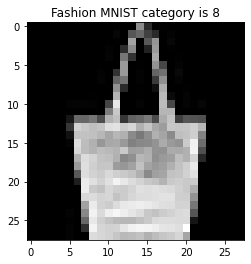

In [8]:
sample_pixel = pixel.loc[9]
sample_label = label.loc[9]
sample_pixel = np.array(sample_pixel, dtype="uint8")
sample_pixel = sample_pixel.reshape((28,28))
plt.title("Fashion MNIST category is {}".format(sample_label))
plt.imshow(sample_pixel, cmap="gray")
plt.show()

In [9]:
X_train = pixel
y_train = label
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [10]:
test = pd.read_csv("fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test = test.iloc[0:, 1:]
y_test = test.iloc[0:, 0]

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [14]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8824

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[855,   0,  13,  31,   1,   1,  89,   0,  10,   0],
       [  2, 974,   3,  14,   1,   1,   5,   0,   0,   0],
       [  9,   1, 800,  14, 115,   0,  52,   0,   9,   0],
       [ 19,   6,   7, 929,  18,   0,  21,   0,   0,   0],
       [  2,   0,  61,  32, 861,   0,  41,   0,   3,   0],
       [  0,   0,   0,   0,   0, 951,   0,  33,   4,  12],
       [179,   1, 104,  27,  82,   0, 592,   0,  15,   0],
       [  0,   0,   0,   0,   0,  17,   0, 936,   0,  47],
       [  1,   1,   9,   0,   3,   1,   5,   2, 978,   0],
       [  0,   0,   1,   0,   0,   6,   0,  42,   3, 948]], dtype=int64)